In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [3]:
df = pd.read_csv("./Datasets/iris.data", index_col=None, header=None)
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']
df = df.iloc[50:150]
df['y'] = df['y'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)
df.head()

,x1,x2,x3,x4,y
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [4]:
X = df[['x2','x3']].values.astype(np.float32)
y = df['y'].values.astype(np.int32)

np.random.seed(123)
shuffle_idx = np.random.permutation(y.size)

X, y = X[shuffle_idx], y[shuffle_idx]
percent70 = int(len(shuffle_idx)*0.7)

X_train, X_test = X[:percent70], X[percent70:]
y_train, y_test = y[:percent70], y[percent70:]

mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu)/sigma
X_test = (X_test - mu)/sigma

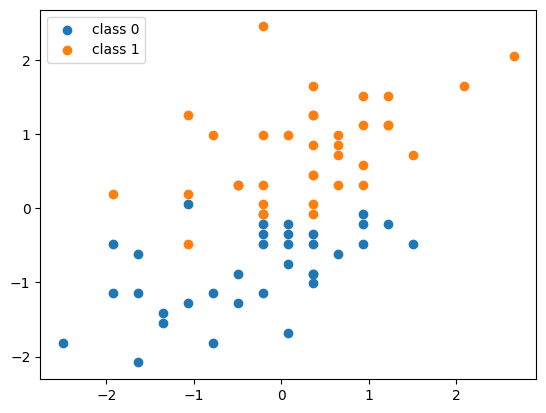

In [5]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train==0, 1], label = "class 0")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train==1, 1], label = "class 1")
plt.legend()
plt.show()

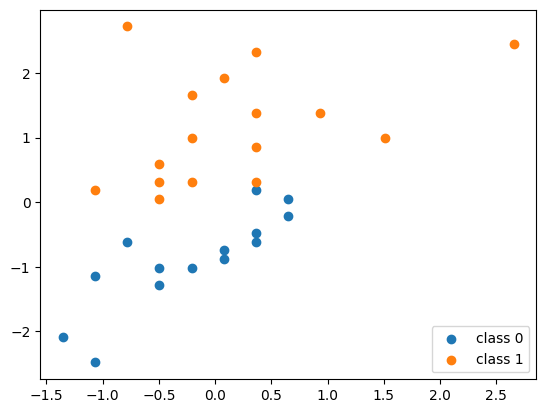

In [6]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test==0, 1], label = "class 0")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test==1, 1], label = "class 1")
plt.legend()
plt.show()

# Tạo mô hình Adaline Advance

In [7]:
class AdalineAdvance():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features,1), dtype=np.float32)
        self.bias = np.zeros((1,), dtype=np.float32)
    
    def forward(self,x):
        netinputs = np.dot(x, self.weights) + self.bias
        activations = netinputs
        return activations.reshape(-1)
    
    def backward(self, x, yhat, y):
        grad_loss_yhat = y - yhat
        grad_yhat_weights = x
        grad_yhat_bias = 1.
        
        # Chain rule: inner times outer // Quy tắc dây chuyền: số lần vào bằng số lần ra
        grad_loss_weights = 2* -np.dot(grad_yhat_weights.T, grad_loss_yhat.reshape(-1,1)) / y.shape[0]
        grad_loss_bias = 2* -np.sum(grad_yhat_bias*grad_loss_yhat) / y.shape[0]
        return (-1.0)*grad_loss_weights, (-1.0)*grad_loss_bias

# Định nghĩa hàm training và hàm đánh giá

In [8]:
def loss(yhat, y):
    return np.mean((yhat-y)**2)

def train(model, x, y, num_epochs, learning_rate = 0.01, seed = 123, minibatch_size=10):
    cost = []
    np.random.seed(seed)
    for e in range(num_epochs):
        ###shuffle epoch
        shuffle_idx = np.random.permutation(y.size)
        minibatches = np.array_split(shuffle_idx, minibatch_size)
        for minibatch_idx in minibatches:
            # Tính đầu ra
            yhat = model.forward(x[minibatch_idx])
            
            # Tính toán độ dốc
            negative_grad_w, negative_grad_b = model.backward(x[minibatch_idx], yhat, y[minibatch_idx])
            
            # Cập nhật lại trong số
            model.weights += learning_rate * negative_grad_w
            model.bias += learning_rate * negative_grad_b
            
            # Khai thác
            minibatch_loss = loss(yhat, y[minibatch_idx])
            print('    Minibatch MSE: %.3f' % minibatch_loss)
            
        # Khai thác
        yhat = model.forward(x)
        curr_loss = loss(yhat, y)
        print('Epoch: %03d' % (e+1), end="")
        print(' | MSE: %.5f' % curr_loss)
        cost.append(curr_loss)
        
    return cost

# Training model hồi quy tuyến tính

In [10]:
start_time = time.time()
model = AdalineAdvance(num_features=X_train.shape[1])
cost = train(model, X_train, y_train, num_epochs=20, learning_rate=0.1, seed = 123, minibatch_size=10)
end_time = time.time()
adaline_time = end_time - start_time

    Minibatch MSE: 0.429
    Minibatch MSE: 0.415
    Minibatch MSE: 0.074
    Minibatch MSE: 0.283
    Minibatch MSE: 0.118
    Minibatch MSE: 0.332
    Minibatch MSE: 0.116
    Minibatch MSE: 0.157
    Minibatch MSE: 0.115
    Minibatch MSE: 0.071
Epoch: 001 | MSE: 0.10066
    Minibatch MSE: 0.080
    Minibatch MSE: 0.143
    Minibatch MSE: 0.075
    Minibatch MSE: 0.098
    Minibatch MSE: 0.133
    Minibatch MSE: 0.112
    Minibatch MSE: 0.061
    Minibatch MSE: 0.079
    Minibatch MSE: 0.110
    Minibatch MSE: 0.113
Epoch: 002 | MSE: 0.09305
    Minibatch MSE: 0.089
    Minibatch MSE: 0.104
    Minibatch MSE: 0.099
    Minibatch MSE: 0.094
    Minibatch MSE: 0.056
    Minibatch MSE: 0.132
    Minibatch MSE: 0.069
    Minibatch MSE: 0.072
    Minibatch MSE: 0.105
    Minibatch MSE: 0.141
Epoch: 003 | MSE: 0.09212
    Minibatch MSE: 0.097
    Minibatch MSE: 0.111
    Minibatch MSE: 0.042
    Minibatch MSE: 0.052
    Minibatch MSE: 0.095
    Minibatch MSE: 0.091
    Minibatch MSE: 0.1

# Đánh giá model

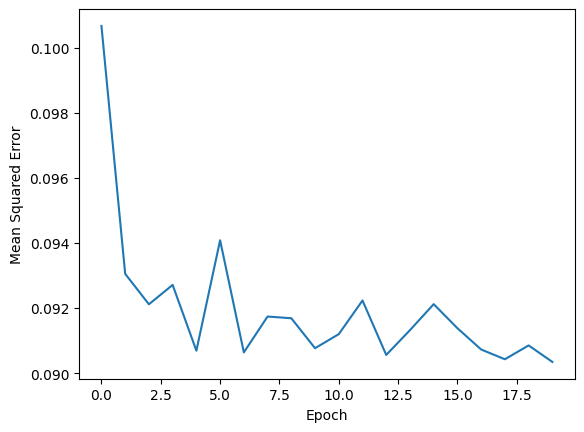

In [11]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

# Ranh giới quyết định

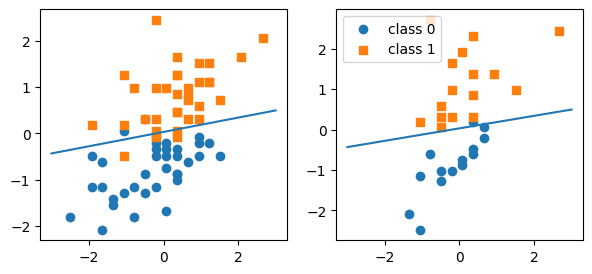

In [12]:
w, b = model.weights, model.bias - 0.5

x_min = -3
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 3
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()

In [22]:
class Perceptron(object):
    def __init__(self, eta = 0.01, n_iter = 5000):
        self.eta = eta
        self.n_iter = n_iter
        
    def output(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return np.where(self.output(X)>=0.0, 1, -1)
    
    def fit(self,X,y):
        self.w_ = np.random.normal(size = X.shape[1]+1)
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                pre = self.predict(xi)
                update = self.eta * (target - pre)
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update!=0.0)
            self.errors_.append(errors)
        return self

In [23]:
start_time = time.time()
nhiphan = Perceptron()
kq = nhiphan.fit(X,y)
end_time = time.time()
MCP_time = end_time-start_time

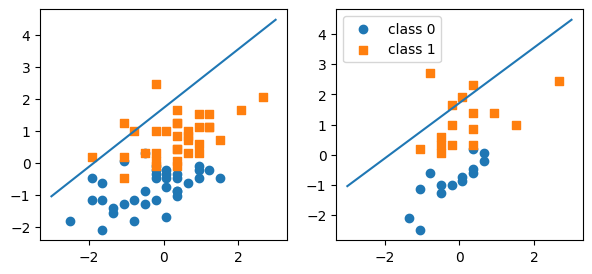

In [24]:
y_min = (-(kq.w_[1] * x_min) - kq.w_[0]) / kq.w_[2]
y_max = (-(kq.w_[1] * x_max) - kq.w_[0]) / kq.w_[2]

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()

In [16]:
print(adaline_time)
print(MCP_time)

0.07758188247680664
3.1077754497528076
